                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2012-10-03 00:00:00                  13.0                           4.0   
2012-10-03 01:00:00                  10.0                           4.0   
2012-10-03 02:00:00                   2.0                           1.0   
2012-10-03 03:00:00                   5.0                           2.0   
2012-10-03 04:00:00                   7.0                           6.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0  


Mon             954.923401
Tue            1177.965190
Wed            1159.079569
Thu             936.635181
Fri             325.611890
Sat           -2246.366993
Sun           -2307.848238
holiday       -2517.801668
PRCP          -1457.604740
Dia_seco       1215.372373
Tem_prom(C)     214.046865
anual            66.852538
dtype: float64

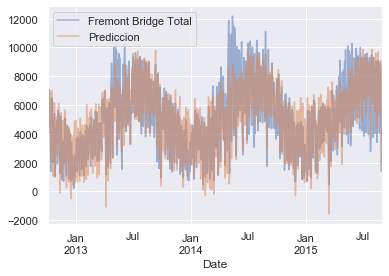

In [29]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
from sklearn.linear_model import LinearRegression
counts=pd.read_csv('C:\\Users\\SONY\\Desktop\\NumPy\\Fremont_Bridge_Bicycle_Counter.csv',parse_dates=True,index_col='Date')
print(counts.head())
counts_diaria=counts.resample('d').sum()
counts_diaria = counts_diaria[['Fremont Bridge Total']] # remove other columns
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    counts_diaria[days[i]] = (counts_diaria.index.dayofweek == i).astype(float)
    
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
s_holyday=pd.Series(1, index=holidays, name='holiday')
counts_diaria=counts_diaria.join(s_holyday)
counts_diaria['holiday'].fillna(0,inplace=True)

clima=pd.read_csv('C:\\Users\\SONY\\Desktop\\NumPy\\BicycleWeather.csv',parse_dates=True,index_col='DATE')
clima['TMAX']/=10
clima['TMIN']/=10
clima['Tem_prom(C)']=0.5*(clima['TMAX']+clima['TMIN'])
clima['PRCP']/=254
clima['Dia_seco']=(clima['PRCP']==0).astype(float)
clima2_0=clima[['Tem_prom(C)','PRCP','Dia_seco']]
counts_diaria=counts_diaria.join(clima2_0)
counts_diaria.dropna(inplace=True)
counts_diaria['anual']=(counts_diaria.index-counts_diaria.index[0]).days/365
counts_diaria

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
 'PRCP', 'Dia_seco', 'Tem_prom(C)', 'anual']
X=counts_diaria[column_names]
y=counts_diaria['Fremont Bridge Total']
modelo=LinearRegression()
modelo.fit(X,y)
y_modelo=modelo.predict(X)
counts_diaria['Prediccion']=y_modelo
counts_diaria[['Fremont Bridge Total','Prediccion']].plot(alpha=0.5)
afectacion_porVariable=pd.Series(modelo.coef_,index=X.columns)
afectacion_porVariable


